# Rf 3 1 3_Paramranges

Multidimensional models: working with parameterized ranges to define non-rectangular regions for fitting and integration




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:50 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Create 3D pdf
-------------------------

Define observable (x,y,z)

In [2]:
x = ROOT.RooRealVar("x", "x", 0, 10)
y = ROOT.RooRealVar("y", "y", 0, 10)
z = ROOT.RooRealVar("z", "z", 0, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Define 3 dimensional pdf

In [3]:
z0 = ROOT.RooRealVar("z0", "z0", -0.1, 1)
px = ROOT.RooPolynomial(
    "px", "px", x, ROOT.RooArgList(
        ROOT.RooFit.RooConst(0)))
py = ROOT.RooPolynomial(
    "py", "py", y, ROOT.RooArgList(
        ROOT.RooFit.RooConst(0)))
pz = ROOT.RooPolynomial("pz", "pz", z, ROOT.RooArgList(z0))
pxyz = ROOT.RooProdPdf("pxyz", "pxyz", ROOT.RooArgList(px, py, pz))

Defined non-rectangular region R in (x, y, z)
-------------------------------------------------------------------------------------

R = Z[0 - 0.1*Y^2] * Y[0.1*X - 0.9*X] * X[0 - 10]

Construct range parameterized in "R" in y [ 0.1*x, 0.9*x ]

In [4]:
ylo = ROOT.RooFormulaVar("ylo", "0.1*x", ROOT.RooArgList(x))
yhi = ROOT.RooFormulaVar("yhi", "0.9*x", ROOT.RooArgList(x))
y.setRange("R", ylo, yhi)

Construct parameterized ranged "R" in z [ 0, 0.1*y^2 ]

In [5]:
zlo = ROOT.RooFormulaVar("zlo", "0.0*y", ROOT.RooArgList(y))
zhi = ROOT.RooFormulaVar("zhi", "0.1*y*y", ROOT.RooArgList(y))
z.setRange("R", zlo, zhi)

Calculate integral of normalized pdf in R
----------------------------------------------------------------------------------

Create integral over normalized pdf model over x,y, in "R" region

In [6]:
intPdf = pxyz.createIntegral(ROOT.RooArgSet(
    x, y, z), ROOT.RooArgSet(x, y, z), "R")

[#1] INFO:NumericIntegration -- RooRealIntegral::init(pxyz_Int[z|R]_Norm[x,y,z]_Int[y|R]) using numeric integrator RooIntegrator1D to calculate Int(y)


Plot value of integral as function of pdf parameter z0

In [7]:
frame = z0.frame(ROOT.RooFit.Title(
    "Integral of pxyz over x,y, in region R"))
intPdf.plotOn(frame)

c = ROOT.TCanvas("rf313_paramranges", "rf313_paramranges", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.6)
frame.Draw()

c.SaveAs("rf313_paramranges.png")

[#1] INFO:NumericIntegration -- RooRealIntegral::init(pxyz_Int[z|R]_Norm[x,y,z]_Int[y|R]_Int[x|R]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pxyz_Int[z|R]_Norm[x,y,z]_Int[y|R]) using numeric integrator RooIntegrator1D to calculate Int(y)


Info in <TCanvas::Print>: png file rf313_paramranges.png has been created


Draw all canvases 

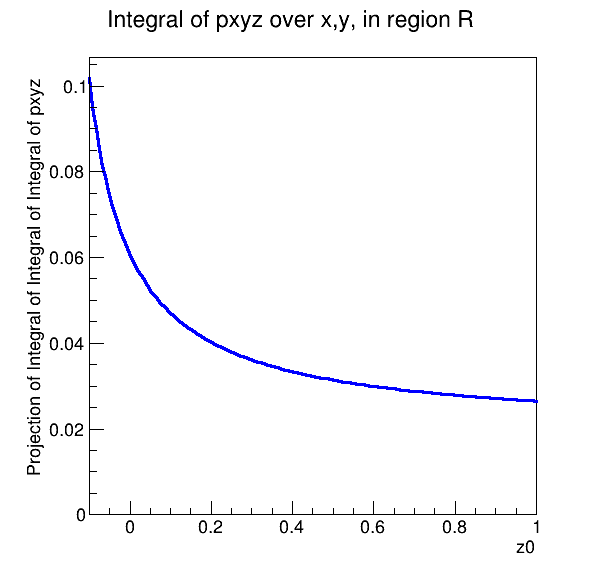

In [8]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()